##  Data analysis of air quality in different states of India

In [100]:
import requests
import pandas as pd
import json
import csv
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### Data extraction using API

In [134]:
# The raw data is extracted from www.data.gov.in using API key and below we save the response

response =  requests.get("https://api.data.gov.in/resource/3b01bcb8-0b14-4abf-b6f2-c1bfd384ba69?api-key=579b464db66ec23bdd000001b80b395f6cac4fd75152c351b4af6e2f&format=json&offset=0&limit=1000")

In [135]:
response.status_code

200

In [136]:
print(type(response.json()))

<class 'dict'>


In [137]:
# Data in JSON format which needs to be converted to CSV

temp = response.json
temp()

{'created': 1543320551,
 'updated': 1631619196,
 'created_date': '2018-11-27T17:39:11Z',
 'updated_date': '2021-09-14T17:03:16Z',
 'active': '1',
 'index_name': '3b01bcb8-0b14-4abf-b6f2-c1bfd384ba69',
 'org': ['Ministry of Environment, Forest and Climate Change',
  'Central Pollution Control Board'],
 'org_type': 'Central',
 'source': 'data.gov.in',
 'title': 'Real time Air Quality Index from various locations',
 'external_ws_url': '',
 'visualizable': '1',
 'field': [{'name': 'id', 'id': 'id', 'type': 'double'},
  {'name': 'country', 'id': 'country', 'type': 'keyword'},
  {'name': 'state', 'id': 'state', 'type': 'keyword'},
  {'name': 'city', 'id': 'city', 'type': 'keyword'},
  {'name': 'station', 'id': 'station', 'type': 'keyword'},
  {'name': 'pollutant_id', 'id': 'pollutant_id', 'type': 'keyword'},
  {'name': 'last_update', 'id': 'last_update', 'type': 'date'},
  {'name': 'pollutant_min', 'id': 'pollutant_min', 'type': 'double'},
  {'name': 'pollutant_max', 'id': 'pollutant_max', '

In [138]:
json_obj = json.dumps(temp())

## Preparation of raw dataset

In [139]:
with open("response.json","w") as outfile:
    outfile.write(json_obj)

In [140]:
with open("response.json") as json_file:
    data = json.load(json_file)
    
raw_data = data["records"]

data_file = open("data_file.csv", "w")
csv_writer = csv.writer(data_file)

count = 0

for data in raw_data:
    if count == 0:
        header = data.keys()
        csv_writer.writerow(header)
        count+=1
        
    csv_writer.writerow(data.values())
    
data_file.close()

In [141]:
df = pd.read_csv("data_file.csv")
df.head(10)

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,14-09-2021 04:00:00,2.0,15.0,8.0
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,14-09-2021 04:00:00,3.0,36.0,15.0
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,14-09-2021 04:00:00,7.0,16.0,10.0
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,14-09-2021 04:00:00,2.0,4.0,3.0
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,14-09-2021 04:00:00,8.0,20.0,14.0
5,6,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",CO,14-09-2021 04:00:00,12.0,30.0,24.0
6,7,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",OZONE,14-09-2021 04:00:00,14.0,37.0,29.0
7,8,India,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",PM2.5,14-09-2021 04:00:00,2.0,21.0,11.0
8,9,India,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",PM10,14-09-2021 04:00:00,8.0,62.0,36.0
9,10,India,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",NO2,14-09-2021 04:00:00,9.0,29.0,15.0


In [142]:
# Preliminary overview

df.head()

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,14-09-2021 04:00:00,2.0,15.0,8.0
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,14-09-2021 04:00:00,3.0,36.0,15.0
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,14-09-2021 04:00:00,7.0,16.0,10.0
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,14-09-2021 04:00:00,2.0,4.0,3.0
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,14-09-2021 04:00:00,8.0,20.0,14.0


### Adding the values of air quality index (AQI)

In the abova dataset the crucial values of AQI which determines the quality of air are not available. In order to make a realistic analysis, this data is obtained from another website https://app.cpcbccr.com/AQI_India/ which is first in xlsx format. This is then changed to csv format for appropriate use

In [143]:
# The data containing AQI values is saved in the dataframe aqi

aqi = pd.read_csv("AQI_latest.csv")
aqi.head()


,Central Pollution Control Board,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,LIST OF AQI STATIONS Date - Time:14-0...,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,S.No.,State,City,Station Name,Current AQI value
3,1,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",27.00
4,2,NaN,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",35.00


In [144]:
# Some necessary changes are done in the aqi dataframe for convenience

aqi = aqi.drop([aqi.index[0], aqi.index[1], aqi.index[2]])
aqi = aqi.rename(columns={"Central Pollution Control Board" : "S.No.", "Unnamed: 1": "State", "Unnamed: 2": "City", 
                          "Unnamed: 3": "Station Name", "Unnamed: 4" : "Current AQI value"})


In [145]:
aqi.columns

Index(['S.No.', 'State', 'City', 'Station Name', 'Current AQI value'], dtype='object')

In [146]:
aqi.head()

,S.No.,State,City,Station Name,Current AQI value
3,1,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",27.00
4,2,NaN,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",35.00
5,3,NaN,Tirupati,"Tirumala, Tirupati - APPCB",Insufficient data available in last 24 hours.
6,4,NaN,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",78.00
7,5,Arunachal Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",51.00


In [147]:
# The relevant data from aqi are the Current AQI values from the rightmost column. This column is then merged with the previous 
# dataframe df


df_new = pd.merge(df, aqi, left_on = "station", right_on="Station Name")
df_new.head()

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg,S.No.,State,City,Station Name,Current AQI value
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,14-09-2021 04:00:00,2.0,15.0,8.0,1,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",27.00
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,14-09-2021 04:00:00,3.0,36.0,15.0,1,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",27.00
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,14-09-2021 04:00:00,7.0,16.0,10.0,1,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",27.00
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,14-09-2021 04:00:00,2.0,4.0,3.0,1,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",27.00
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,14-09-2021 04:00:00,8.0,20.0,14.0,1,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",27.00


In [148]:
# The redundant columns are dropped

df_new.drop(["S.No.", "State", "City", "Station Name"], axis=1, inplace=True)

In [149]:
# The AQI values are at present in object data type and also contains some strings. This needs to be appropriately processed. 
# In particular, the string values "Not sufficient data..." are replaced by a unique number which does not fall in the 
# practical range of AQI values. This would be required in the binning process of the aqi values

df_new.replace("Insufficient data available in last 24 hours.", "-1.1", inplace=True)


In [150]:
df_new["Current AQI value"].unique()

array(['27.00', '35.00', '-1.1', '78.00', '51.00', '88.00', '62.00',
       '61.00', '49.00', '60.00', '43.00', '53.00', '54.00', '38.00',
       '37.00', '91.00', '70.00', '113.00', '132.00', '56.00', '103.00',
       '72.00', '69.00', '50.00', '63.00', '46.00', '59.00', '89.00',
       '67.00', '79.00', '65.00', '71.00', '55.00', '104.00', '84.00',
       '36.00', '119.00', '96.00', '31.00', '47.00', '106.00', '160.00',
       '34.00', '25.00', '29.00', '76.00', '39.00', '73.00', '57.00',
       '33.00', '42.00', '82.00', '66.00', '26.00', '58.00', '115.00',
       '123.00', '167.00', '48.00', '40.00', '128.00', '32.00', '44.00',
       '68.00', '19.00', '22.00', '52.00', '30.00', '21.00', '99.00',
       '20.00', '75.00'], dtype=object)

In [151]:
df_new["Current AQI value"]  = pd.to_numeric(df_new["Current AQI value"])
df_new["Current AQI value"].dtype

dtype('float64')

In [152]:
# Now, a remark column is added which containts categorical values determining the air quality of a station, based on a
# standard norm followed


df_new["Remark"] = pd.cut(x=df_new["Current AQI value"], bins=[-1.2, 0,50,100,200,300,400, 500], labels=["Insufficient data",
                                                                            "Good", "Satisfactory",
                                                                                "Moderate", "Poor", "Very Poor","Severe"])
df_new.head()

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg,Current AQI value,Remark
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,14-09-2021 04:00:00,2.0,15.0,8.0,27.0,Good
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,14-09-2021 04:00:00,3.0,36.0,15.0,27.0,Good
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,14-09-2021 04:00:00,7.0,16.0,10.0,27.0,Good
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,14-09-2021 04:00:00,2.0,4.0,3.0,27.0,Good
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,14-09-2021 04:00:00,8.0,20.0,14.0,27.0,Good


### Removing duplicate values from the dataframe
The dataset contains multiple values in the "Remark" column for a particular station, where the air quality is described in terms of a category. Since, for a particular station, there is a unique value of AQI and remark, the extra values of "Remark" can be removed which allows a more conveninient analysis and prevents any confusion. The same is also done for the AQI column 

In [153]:
# First, a list of unique values of station names is prepared

station_list = df_new["station"].unique().tolist()

Next, a series containing only a single value of AQI and remark for each station is created.

In [154]:
# A temporary series called ser is created to hold the values

for stn in station_list:
    cond = df_new["station"] == stn
    ser[stn] = df_new[cond]["Remark"].drop_duplicates()
    
    

In [155]:
ser

996                                                                                            Good
Secretariat, Amaravati - APPCB                    0    Good
Name: Remark, dtype: category
Catego...
Anand Kala Kshetram, Rajamahendravaram - APPCB    7    Good
Name: Remark, dtype: category
Catego...
Tirumala, Tirupati - APPCB                        14    Insufficient data
Name: Remark, dtype: c...
GVM Corporation, Visakhapatnam - APPCB            21    Satisfactory
Name: Remark, dtype: catego...
                                                                        ...                        
Sector-D Industrial Area, Mandideep - MPPCB       981    Satisfactory
Name: Remark, dtype: categ...
Sector-2 Industrial Area, Pithampur - MPPCB       988    Satisfactory
Name: Remark, dtype: categ...
Shasthri Nagar, Ratlam - IPCA Lab                 995    Good
Name: Remark, dtype: category
Cate...
Deen Dayal Nagar, Sagar - MPPCB                   999    Good
Name: Remark, dtype: category
Cate...


In [156]:
# The above step is reapeated for the AQI column values

for stn in station_list:
    cond = df_new["station"] == stn
    ser_2[stn] = df_new[cond]["Current AQI value"].drop_duplicates()
    

In [158]:
 #ser_2 = ser_2.drop(labels = [996])

In [159]:
# The above series is now converted to a dataframe for convenient analysis

temp_frame = ser.to_frame()

In [160]:
temp_frame.drop(temp_frame.index[0], inplace= True)

In [161]:
temp_frame["Current AQI value"] = ser_2.values
temp_frame["Current AQI value"].dtype
temp_frame

,Remark,Current AQI value
"Secretariat, Amaravati - APPCB","0 Good Name: Remark, dtype: category Catego...","0 27.0 Name: Current AQI value, dtype: float64"
"Anand Kala Kshetram, Rajamahendravaram - APPCB","7 Good Name: Remark, dtype: category Catego...","7 35.0 Name: Current AQI value, dtype: float64"
"Tirumala, Tirupati - APPCB","14 Insufficient data Name: Remark, dtype: c...","14 -1.1 Name: Current AQI value, dtype: float64"
"GVM Corporation, Visakhapatnam - APPCB","21 Satisfactory Name: Remark, dtype: catego...","21 78.0 Name: Current AQI value, dtype: flo..."
"Naharlagun, Naharlagun - APSPCB","28 Satisfactory Name: Remark, dtype: catego...","28 51.0 Name: Current AQI value, dtype: flo..."
...,...,...
"Sector-D Industrial Area, Mandideep - MPPCB","981 Satisfactory Name: Remark, dtype: categ...","981 53.0 Name: Current AQI value, dtype: fl..."
"Sector-2 Industrial Area, Pithampur - MPPCB","988 Satisfactory Name: Remark, dtype: categ...","988 75.0 Name: Current AQI value, dtype: fl..."
"Shasthri Nagar, Ratlam - IPCA Lab","995 Good Name: Remark, dtype: category Cate...","995 47.0 Name: Current AQI value, dtype: fl..."
"Deen Dayal Nagar, Sagar - MPPCB","999 Good Name: Remark, dtype: category Cate...","999 26.0 Name: Current AQI value, dtype: fl..."


### Processing the values of  remark and current AQI values
In the temp_frame, the values of the remark column and current AQI values contain a combination of strings which we need to appropriately parse. First, the values are converted to string datatype such the split method can be used. Next, we split the string and form an additional column  with the first element i.e the numeric of each row. Then, the remark column values are replaced by the second element of each row i.e the actual remark category.

In [162]:
# Converting the values of Remark column to string to allow necessary parsing

temp_frame["Current AQI value"] = temp_frame["Current AQI value"].astype("string")
print(temp_frame["Current AQI value"].dtypes)

temp_frame["Remark"] = temp_frame["Remark"].astype("string")
print(temp_frame["Remark"].dtypes)

string
string


In [163]:
# A new column containing the list of elements after splitting is added

temp_frame["Current AQI value"] = temp_frame["Current AQI value"].str.split().str[1]

temp_frame["Split_remark"] = temp_frame["Remark"].str.split()

temp_frame["id"] = temp_frame["Split_remark"].str[0]

temp_frame["Remark"] = temp_frame["Split_remark"].str[1]

temp_frame.head()

,Remark,Current AQI value,Split_remark,id
"Secretariat, Amaravati - APPCB",Good,27.0,"[0, Good, Name:, Remark,, dtype:, category, Ca...",0
"Anand Kala Kshetram, Rajamahendravaram - APPCB",Good,35.0,"[7, Good, Name:, Remark,, dtype:, category, Ca...",7
"Tirumala, Tirupati - APPCB",Insufficient,-1.1,"[14, Insufficient, data, Name:, Remark,, dtype...",14
"GVM Corporation, Visakhapatnam - APPCB",Satisfactory,78.0,"[21, Satisfactory, Name:, Remark,, dtype:, cat...",21
"Naharlagun, Naharlagun - APSPCB",Satisfactory,51.0,"[28, Satisfactory, Name:, Remark,, dtype:, cat...",28


In [164]:
temp_frame.drop("Split_remark", axis=1, inplace = True)

In [165]:
# For merging purpose, the id values need to be converted to int type and also have to be incremented by one in order to match
# with the id's of df_new

temp_frame["id"] = temp_frame["id"].astype(int)
temp_frame["id"] = temp_frame["id"].add(1)

In [166]:
temp_frame

,Remark,Current AQI value,id
"Secretariat, Amaravati - APPCB",Good,27.0,1
"Anand Kala Kshetram, Rajamahendravaram - APPCB",Good,35.0,8
"Tirumala, Tirupati - APPCB",Insufficient,-1.1,15
"GVM Corporation, Visakhapatnam - APPCB",Satisfactory,78.0,22
"Naharlagun, Naharlagun - APSPCB",Satisfactory,51.0,29
...,...,...,...
"Sector-D Industrial Area, Mandideep - MPPCB",Satisfactory,53.0,982
"Sector-2 Industrial Area, Pithampur - MPPCB",Satisfactory,75.0,989
"Shasthri Nagar, Ratlam - IPCA Lab",Good,47.0,996
"Deen Dayal Nagar, Sagar - MPPCB",Good,26.0,1000


### Final dataframe to be used for analysis

In [167]:
# Now, the dataframes can be joined with the id values as joining key

df_main = df_new.merge(temp_frame,  how ="left", left_on = "id", right_on ="id")
df_main.head()

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg,Current AQI value_x,Remark_x,Remark_y,Current AQI value_y
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,14-09-2021 04:00:00,2.0,15.0,8.0,27.0,Good,Good,27.0
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,14-09-2021 04:00:00,3.0,36.0,15.0,27.0,Good,NaN,NaN
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,14-09-2021 04:00:00,7.0,16.0,10.0,27.0,Good,NaN,NaN
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,14-09-2021 04:00:00,2.0,4.0,3.0,27.0,Good,NaN,NaN
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,14-09-2021 04:00:00,8.0,20.0,14.0,27.0,Good,NaN,NaN


In [168]:
# Some relevant changes in the columns of the new dataframe are done

df_main.drop(["Remark_x", "Current AQI value_x"], axis =1, inplace= True)
df_main.rename(columns = {"Remark_y": "Remark","Current AQI value_y" : "Current AQI value" }, inplace = True)

In [169]:
# For better presentation, all the null values of remark column are replaced by empty string.

df_main["Current AQI value"].fillna("", inplace = True)
df_main["Remark"].fillna(" ", inplace = True)

In [170]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1000 non-null   int64  
 1   country            1000 non-null   object 
 2   state              1000 non-null   object 
 3   city               1000 non-null   object 
 4   station            1000 non-null   object 
 5   pollutant_id       1000 non-null   object 
 6   last_update        1000 non-null   object 
 7   pollutant_min      946 non-null    float64
 8   pollutant_max      946 non-null    float64
 9   pollutant_avg      946 non-null    float64
 10  Remark             1000 non-null   object 
 11  Current AQI value  1000 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 101.6+ KB


In [171]:
df_main.isnull().sum()

id                    0
country               0
state                 0
city                  0
station               0
pollutant_id          0
last_update           0
pollutant_min        54
pollutant_max        54
pollutant_avg        54
Remark                0
Current AQI value     0
dtype: int64

In [172]:
df_main.describe()

,id,pollutant_min,pollutant_max,pollutant_avg
count,1000.000000,946.000000,946.000000,946.000000
mean,500.500000,14.427061,48.889006,27.090909
std,288.819436,14.666142,51.662697,22.326916
min,1.000000,1.000000,1.000000,1.000000
25%,250.750000,4.000000,15.000000,10.000000
50%,500.500000,10.000000,37.000000,22.000000
75%,750.250000,20.000000,68.000000,39.000000
max,1000.000000,115.000000,500.000000,173.000000


### Filling the null values
It is evident that certain stations have no data for any of the pollutants, although the AQI value and corresponding remark is available. As such, dropping the null values may not be sensible. Instead, we replace them by the nearest value to it which ensures that the inputed data is sensible with respect to the values of other pollutant. The underlying assumption here is that the values of each pollutant in a particular station do not differ by very significant amount.

In [173]:
df_main["pollutant_min"] = df_main["pollutant_min"].interpolate(method="nearest")
df_main["pollutant_max"] = df_main["pollutant_max"].interpolate(method="nearest")
df_main["pollutant_avg"] = df_main["pollutant_avg"].interpolate(method="nearest")

In [174]:
df_main.isnull().sum().sum()

0

## Exploratory data analysis

Now, we are ready to conduct some analysis on the prepared data. It would be convenient to start with a general overview of
the air quality in all the stations, and then go ito the particular details. For this, we first show the number of stations in each remark category, which gives a broad idea about the air quality in the overall country.


### What is the average AQI value of each state?
The average is computed with respect to the number of stations within each state. We need to take care of thr fact that there are some spurious values in this column i.e, 0.0 and -1.1 which represent null value and insufficient data respectively. Hence, this values need to appropriately removed before computing the average AQI of a particular state

In [175]:
df_main["Current AQI value"] = df_main["Current AQI value"].replace("", "0")
df_main["Current AQI value"] = df_main["Current AQI value"].astype(float)
df_main["Current AQI value"].dtypes

dtype('float64')

In [176]:
lst = df_main["state"].unique().tolist()
lst

['Andhra_Pradesh',
 'Arunachal_Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Delhi',
 'Gujarat',
 'Haryana',
 'Jammu_&_Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh']

In [177]:
len_vals = []

for elm in lst:
    cond = df_main["state"] == elm
    aqi_vals = df_main[cond]["Current AQI value"].unique().tolist()
    if 0.0 in aqi_vals:
        aqi_vals.remove(0.0)
    
    if -1.1 in aqi_vals:
        aqi_vals.remove(-1.1)
    
    lng  = len(aqi_vals)
    
    
    len_vals.append(lng)

print("These are the average AQI value of eah state", len_vals)

These are the average AQI value of eah state [3, 1, 1, 7, 2, 28, 15, 24, 1, 0, 23, 7, 10]


From the above list it is evident that for a particular state there are no sensible AQI values and hence the length happens to be zero. As such, it is not possible to obtain the particular average AQI for the corresponding state and will instrad give division by zero error. So, we drop the state which is Jharkhand from our state list.

In [181]:
lst.remove("Jharkhand")

In [182]:
avg_vals = []

for elm in lst:
    cond = df_main["state"] == elm
    aqi_vals = df_main[cond]["Current AQI value"].unique().tolist()
    if 0.0 in aqi_vals:
        aqi_vals.remove(0.0)
    
    if -1.1 in aqi_vals:
        aqi_vals.remove(-1.1)
    
    
    summ = sum(aqi_vals)
    lng  = len(aqi_vals)
    avg  = summ/lng
    
    avg_vals.append(avg)

print("These are the average AQI value of eah state", avg_vals)

These are the average AQI value of eah state [46.666666666666664, 51.0, 88.0, 54.57142857142857, 37.5, 70.89285714285714, 65.4, 58.625, 167.0, 44.91304347826087, 54.714285714285715, 43.9]


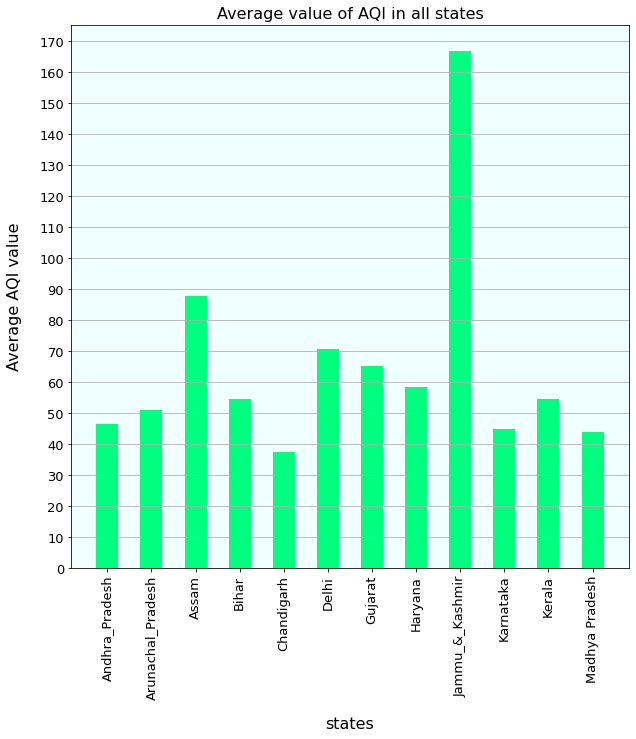

In [183]:
plt.bar(lst, avg_vals, width = 0.5, color = "springgreen")
plt.xlabel("states", fontsize=16, labelpad=17)
ax = plt.axes()

ax.set_facecolor("azure")

plt.ylabel("Average AQI value", fontsize=16, labelpad=17)
plt.grid(zorder = 0, axis = "y")
plt.title("Average value of AQI in all states", fontsize=16)

plt.xticks(lst, rotation = 90, fontsize=13)

y = np.arange(0,180,10)
plt.yticks(y, fontsize=13)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()

### What is number distribution of stations within each "Remark" category?
Now, we try to get an idea of how many stations all over India record AQI values falling in each of the remark

Text(0.5, 1.0, 'No. of stations in each remark catergory')

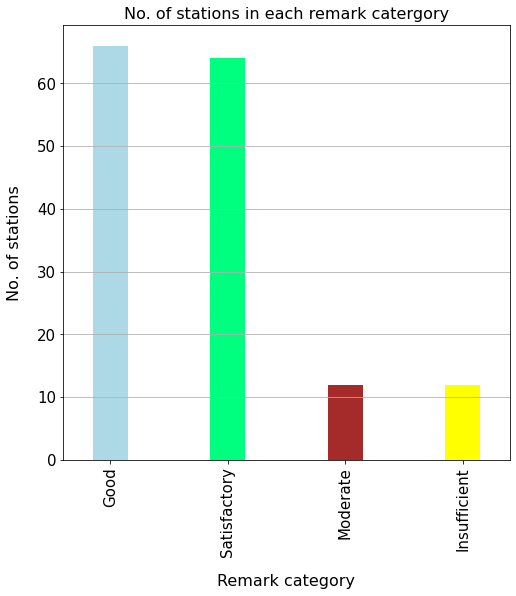

In [184]:
# The "insufficuent" category denotes that there was not sufficient in that particular station, hence its overall
# remark cannot be determined

import matplotlib.pyplot as plt

colors = ["lightblue", "springgreen", "brown", "yellow"]

df_main["Remark"].value_counts()[1:].plot(kind="bar", figsize= (8,8), color =colors, width=0.30)
plt.grid(zorder = 0, axis = "y")
plt.xlabel("Remark category", fontsize=16, labelpad=17)
plt.ylabel("No. of stations", fontsize=16,labelpad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("No. of stations in each remark catergory", fontsize=16)

In [185]:
df_main.groupby("state")["Remark"].value_counts()[1:]

state              Remark      
Andhra_Pradesh     Good              2
                   Insufficient      1
                   Satisfactory      1
Arunachal_Pradesh                    6
                   Satisfactory      1
Assam                               12
                   Insufficient      1
                   Satisfactory      1
Bihar                               56
                   Satisfactory      5
                   Good              3
                   Insufficient      2
Chandigarh                          12
                   Good              2
Delhi                              212
                   Satisfactory     28
                   Good              5
                   Moderate          4
                   Insufficient      1
Gujarat                             90
                   Good              7
                   Satisfactory      5
                   Moderate          3
                   Insufficient      1
Haryana                         

### How many stations within each state record each of the remark category?
We can also understand how many stations within each state obtain each of the remark

In [186]:
x_good = []
x_sats = []
x_mod  = []

for elm in lst:
    cond = df_main["state"] == elm
    X = df_main[cond]["Remark"].value_counts()[1:]
    if "Good" in X.index:
        x_good.append(X["Good"])
    else:
        x_good.append(0)
            
    if "Satisfactory" in X.index:
        x_sats.append(X["Satisfactory"])
    else:
        x_sats.append(0)
        
    if "Moderate" in X.index:
        x_mod.append(X["Moderate"])
    else:
        x_mod.append(0)
        
    
print(x_good)
print(x_sats)
print(x_mod)
    
    

[2, 0, 0, 3, 2, 5, 7, 12, 0, 21, 5, 9]
[1, 1, 1, 5, 0, 28, 5, 12, 0, 6, 2, 3]
[0, 0, 0, 0, 0, 4, 3, 3, 1, 1, 0, 0]


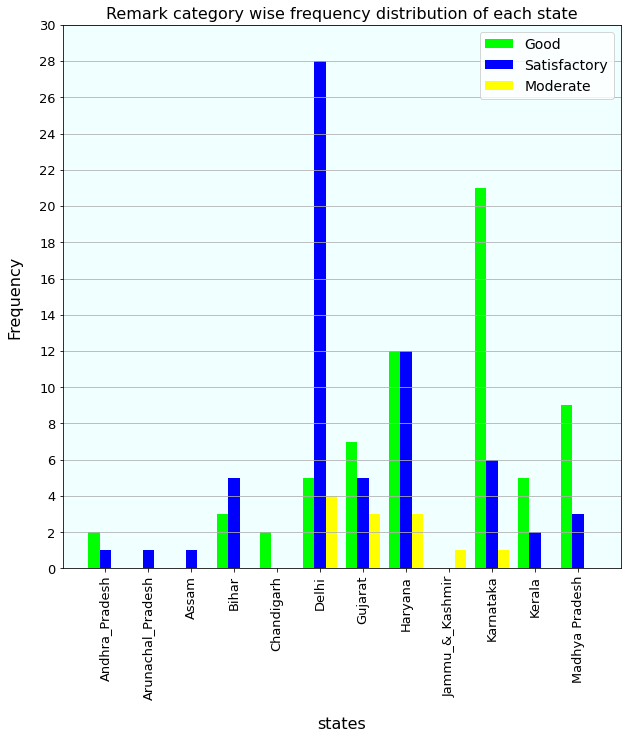

In [187]:
N = len(lst)
ind = np.arange(0, N*3,3)
width = 0.8
bar_1 = plt.bar(ind, x_good, width, color = "lime")
bar_2 = plt.bar(ind+width, x_sats, width, color="blue")
bar_3 = plt.bar(ind+width*2, x_mod, width, color="yellow")

plt.xlabel("states", fontsize=16, labelpad=17)
ax = plt.axes()

ax.set_facecolor("azure")

plt.ylabel("Frequency", fontsize=16, labelpad=17)
plt.grid(zorder = 0, axis = "y")
plt.title("Remark category wise frequency distribution of each state", fontsize=16)


plt.xticks(ind+width, lst, rotation = 90, fontsize=13)
plt.legend((bar_1, bar_2, bar_3), ("Good", "Satisfactory", "Moderate"), fontsize=14)

y = np.arange(0,31,2)
plt.yticks(y, fontsize=13)

plt.rcParams["figure.figsize"] = (10,10)

plt.show()


### What is the concentration of each pollutant within the entire country?
Among the seven different pollutants, we can check what is the overall concentration of each pollutant in the entire country

Text(0.5, 0.9, 'Percentage composition of each pollutant in the entire country ')

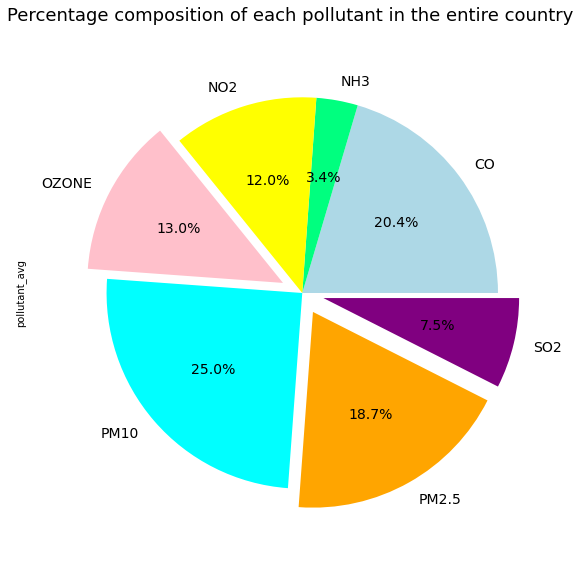

In [188]:
# Distribution of each pollutant in the overall country


colors = ["lightblue", "springgreen", "yellow", "pink", "cyan", "orange", "purple"]
df_main.groupby("pollutant_id").sum()["pollutant_avg"].plot(kind = "pie",colors = colors, textprops={'fontsize': 14},
                                                            radius =0.9 ,autopct='%1.1f%%', 
                                                            explode = (0,0,0,0.1,0,0.1,0.1))
plt.suptitle("Percentage composition of each pollutant in the entire country ", size =18, y=0.9)

From the above plot some comments can be made rightaway. For eg, it is evident that Karnataka has the maximum no. stations getting a "good" category AQI value while Delhi has the minimum value for the same parameter. Thus, it may be worth to further analyse the details in these two states. 
Let us analyse the average concentration of each pollutant in Delhi and Karnataka

In [189]:
poll_lst = df_main["pollutant_id"].unique().tolist()

### What is the average value of each pollutant in Delhi and Karnataka?
Again, here we consider the average pollutant value within each station of a state and compute its average

In [190]:
f1 = df_main["state"] == "Delhi"
f2 = df_main["state"] == "Karnataka"
p1 = df_main["pollutant_id"] == "PM2.5"


temp = df_main[f2].groupby("pollutant_id").mean()
temp["pollutant_avg"].values.tolist()

[32.74193548387097,
 8.961538461538462,
 15.931034482758621,
 19.620689655172413,
 34.25806451612903,
 23.115384615384617,
 16.033333333333335]

In [191]:
print(df_main[f1].groupby("pollutant_id").mean()["pollutant_avg"].values.tolist())
print(df_main[f2].groupby("pollutant_id").mean()["pollutant_avg"].values.tolist())


[48.86842105263158, 9.419354838709678, 26.56756756756757, 27.13157894736842, 61.611111111111114, 41.421052631578945, 12.75]
[32.74193548387097, 8.961538461538462, 15.931034482758621, 19.620689655172413, 34.25806451612903, 23.115384615384617, 16.033333333333335]


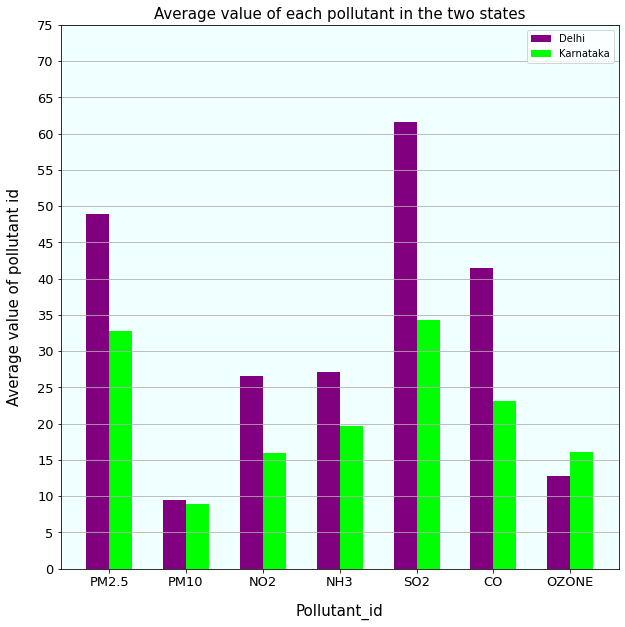

In [192]:
x_1 = df_main[f1].groupby("pollutant_id").mean()["pollutant_avg"].values.tolist()
x_2 = df_main[f2].groupby("pollutant_id").mean()["pollutant_avg"].values.tolist()

n = 7
r = np.arange(n)
width = 0.3

bar1 = plt.bar(r, x_1, color = "purple", label ="Delhi", width = width )
bar2 = plt.bar(r + width, x_2, color = "lime", width = width, label= "Karnataka")

plt.xlabel("Pollutant_id", fontsize=15, labelpad=15)
ax = plt.axes()
ax.set_facecolor("azure")
plt.ylabel("Average value of pollutant id", fontsize=15, labelpad= 15)
plt.grid(zorder = 0, axis = "y")
plt.legend((bar1, bar2), ("Delhi", "Karnataka"), fontsize=17)
plt.title("Average value of each pollutant in the two states", fontsize=15)

plt.rcParams["figure.figsize"] = (10,10)

plt.xticks(r + width/2, poll_lst, fontsize= 13)
y = np.arange(0,76,5)
plt.yticks(y, fontsize=13)
plt.legend()

plt.show()